## Método de MonteCarlo: Ejercicio 8

<IPython.core.display.Javascript object>


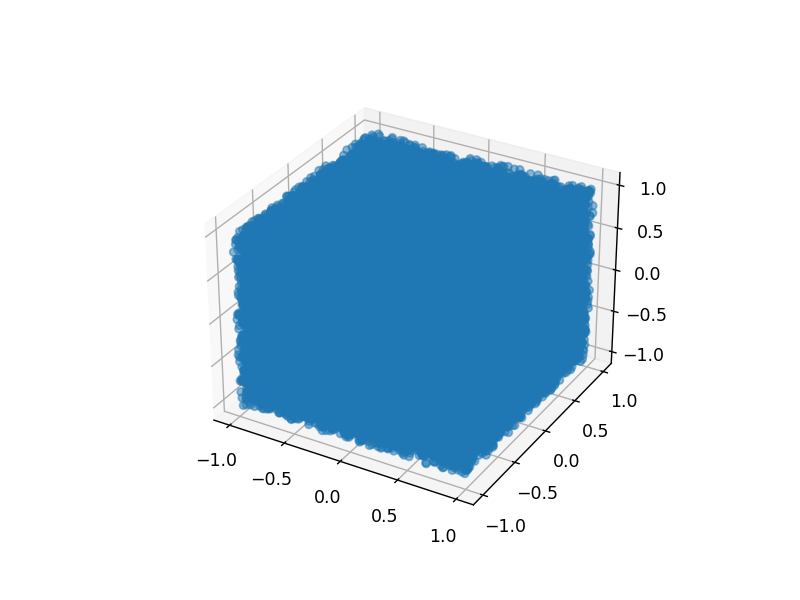

In [22]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook
N = int(1e5)
# Valores de los límites del rectángulo donde estarán los puntos
xmin = -1
xmax = 1
ymin = -1
ymax = 1
zmin = -1
zmax = 1 
#Valor del volumen del rectángulo
V_total = (xmax-xmin)*(ymax-ymin)*(zmax - zmin) 

#Inicialización de los puntos random
x = np.random.rand(N)*(xmax - xmin) + xmin
y = np.random.rand(N)*(ymax - ymin) + ymin
z = np.random.rand(N)*(zmax - zmin) + zmin
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter3D(x,y,z,alpha=0.5)

In [ ]:
import tqdm as tqdm
def CreateSphere(N,R=1):
    
    Points = np.zeros((N,3))
        
    for i in range(N):
        
        phi = np.random.uniform(0,2*np.pi)
        u = np.random.rand()
        r = R*u**(1/3)
        costheta = np.random.uniform(-1,1)
        theta = np.arccos(costheta)
        
        Points[i] = [r*np.cos(phi)*np.sin(theta),r*np.sin(phi)*np.sin(theta),r*np.cos(theta)]
        
    return Points
Sphere = CreateSphere(N)
x = Sphere[:,0]
y = Sphere[:,1]
z = Sphere[:,2]

I_diag = np.zeros(3)

sum1= 0
sum2 = 0
sum3= 0
    
for i in range(N):
    sum1 += y[i]**2 + z[i]**2
I_diag[0] = (1/N)*sum1

for i in range(N):
    sum2 += x[i]**2 + z[i]**2
I_diag[1] = (1/N)*sum2

for i in range(N):
    sum3 += x[i]**2 + y[i]**2
I_diag[2] = (1/N)*sum3


In [31]:
I_diag

array([0.40052961, 0.79914417, 1.20051333])